###Initial things

In [2]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support

from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:ylabel='Class'>

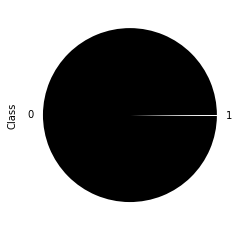

In [4]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [5]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

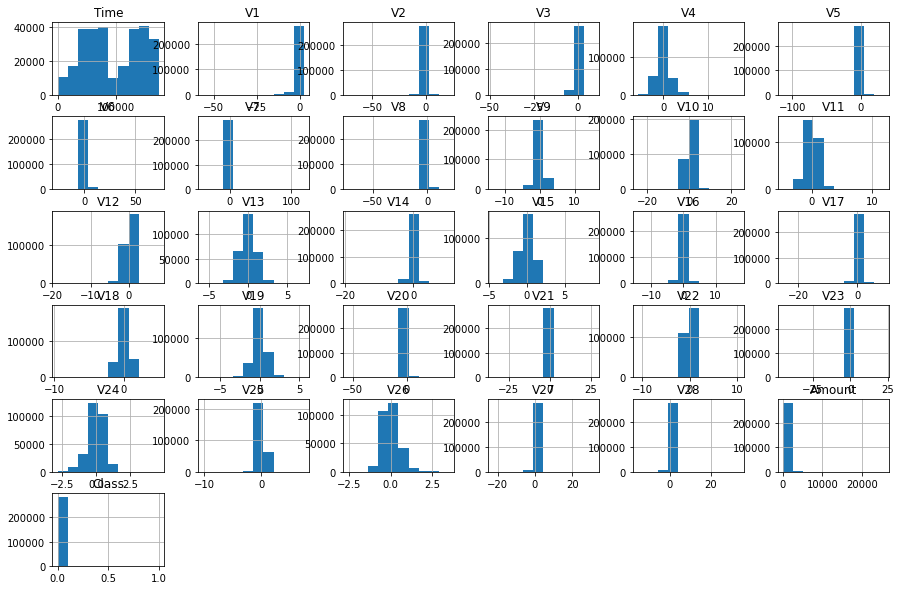

In [7]:
dataset.hist(figsize=(15, 10));

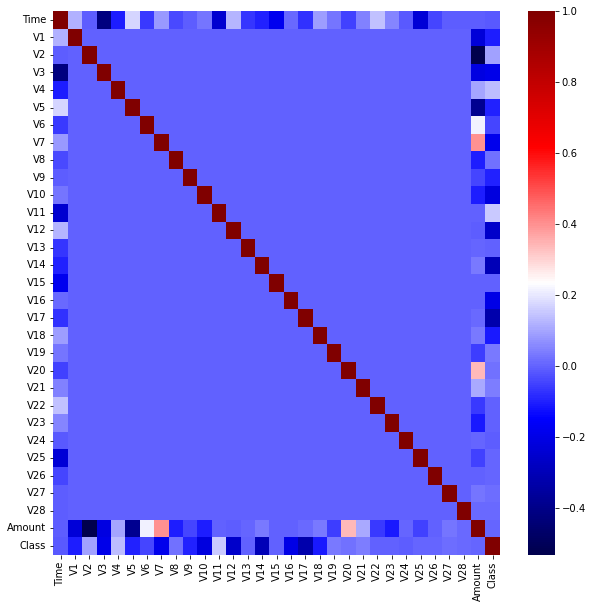

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [9]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [10]:
scores = []

In [11]:
#  "Support Vector Machine",
#names = ["Logistic Regression", "Random Forest", "XGBoost", "Ada Boost", "Stochastic Gradient Descent", "Neural Network Models (supervised)", 
#         "Decision Trees", "Gaussian Naive Bayes", "Gradient Boosting", "K-Nearest Neighbors", "Voting Classifier"]

names = ["LR", "RF", "XGBoost", "Ada Boost", "SGD", "NN(Supervised)", "DT", "GNB", "GB", "KNN", "VC", "SVM"]


In [12]:
preci = []
recall = []
f1 = []

###Logistic Regression

In [13]:
from imblearn.combine import SMOTETomek 
X = np.asarray(dataset.drop('Class', axis=1))
y = np.asarray(dataset['Class'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=30)
X_train.shape

(227845, 30)

In [15]:
smetk = SMOTETomek(random_state=30)
X_train, y_train = smetk.fit_resample(X_train, y_train)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 226844, 1: 226844})


In [16]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 226844, 1: 226844})
Counter({0: 56864, 1: 98})


In [17]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [18]:
#import time
#start_time = time.clock()
#print(time.clock() - start_time, "seconds")

In [19]:
lr_clf = LogisticRegression(max_iter=300000)
# training the Logistic Regression Model with Training Data
import time
#start_time = time.clock()
lr_clf.fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

LogisticRegression(max_iter=300000)

In [20]:
# accuracy on testing data
y_test_pred = lr_clf.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9926617745163442


In [21]:
scores.append(testing_data_accuracy)

In [22]:
print(confusion_matrix(y_test, y_test_pred))

[[56462   402]
 [   16    82]]


In [23]:
#!pip install mlxtend

In [24]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

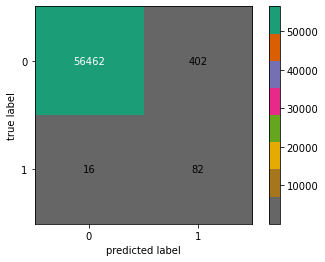

In [25]:
lr_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.84      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.64     56962
weighted avg       1.00      0.99      1.00     56962



In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))


###Random Forest

In [28]:
# from sklearn.experimental import enable_halving_search_cv  # noqa
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [29]:
# clf = RandomForestClassifier(n_jobs=-1)

# param_grid = {
#     'min_samples_split': [3, 5, 10], 
#     'n_estimators' : [100, 300, 500],
#     'max_depth': [3, 5, 15, 25],
#     'max_features': [3, 5, 10, 20]
# }

# scorers = {
#     'precision_score': make_scorer(precision_score),
#     'recall_score': make_scorer(recall_score),
#     'accuracy_score': make_scorer(accuracy_score)
# }

In [30]:
# def grid_search_wrapper(refit_score='precision_score'):
#     """
#     fits a GridSearchCV classifier using refit_score for optimization
#     prints classifier performance metrics
#     """
#     skf = StratifiedKFold(n_splits=10)
#     grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
#                            cv=skf, return_train_score=True, n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     # make the predictions
#     y_pred = grid_search.predict(X_test)

#     print('Best params for {}'.format(refit_score))
#     print(grid_search.best_params_)

#     # confusion matrix on the test data.
#     print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
#     print(pd.DataFrame(confusion_matrix(y_test, y_pred),
#                  columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
#     return grid_search

In [31]:
# grid_search_clf = grid_search_wrapper(refit_score='precision_score')

In [32]:

rf_clf = RandomForestClassifier(n_estimators=300)
#import time
#start_time = time.clock()
rf_clf.fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")


y_test_pred = np.array(rf_clf.predict(X_test))

In [33]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9993328885923949


In [34]:
print(confusion_matrix(y_test, y_test_pred))

[[56849    15]
 [   23    75]]


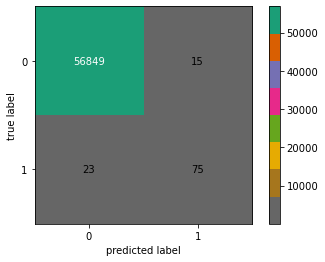

In [35]:
rf_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.77      0.80        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Extreme Gradient Boosting (XGBoost)

In [38]:
xgb_clf = XGBClassifier(n_estimators=300, use_label_encoder=False)
#import time
#start_time = time.clock()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')
#print(time.clock() - start_time, "seconds")


y_test_pred = xgb_clf.predict(X_test)

In [39]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9993679997191109


In [40]:
print(confusion_matrix(y_test, y_test_pred))

[[56849    15]
 [   21    77]]


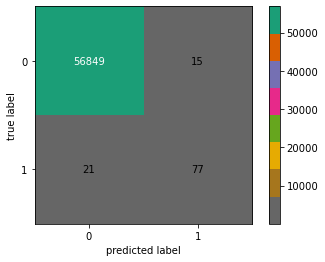

In [41]:
xgb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=xgb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [42]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.79      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Ada Boost

In [44]:
from sklearn import ensemble
# Creating classifier Object
#import time
#start_time = time.clock()
adaboost_clf = ensemble.AdaBoostClassifier(n_estimators=300).fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [45]:
y_test_pred = adaboost_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9965766651451845


In [46]:
print(confusion_matrix(y_test, y_test_pred))

[[56687   177]
 [   18    80]]


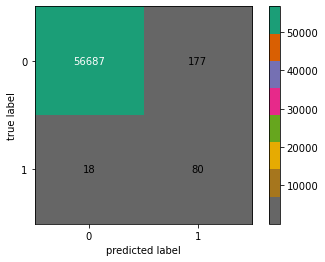

In [47]:
ab_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=ab_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [48]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.82      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.91      0.72     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Stochastic gradient descent

In [50]:
from sklearn.linear_model import SGDClassifier

In [51]:
import time
#start_time = time.clock()
sgd_clf = SGDClassifier(loss="log", penalty="l2", max_iter=3000000).fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [52]:
y_test_pred = sgd_clf.predict(X_test)

In [53]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9915908851515045


In [54]:
print(confusion_matrix(y_test, y_test_pred))

[[56399   465]
 [   14    84]]


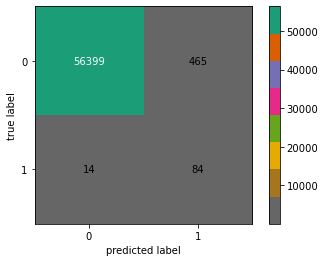

In [55]:
sgd_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=sgd_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.86      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.92      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [57]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Neural network models (supervised)

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [60]:
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (150, 100, 50), random_state = 1, max_iter=300000)
#import time
#start_time = time.clock()
nn_clf = nn_clf.fit(X_train_norm, y_train)
#print(time.clock() - start_time, "seconds")


In [61]:
y_test_pred = nn_clf.predict(X_test_norm)

In [62]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9900986622660721


In [63]:
print(confusion_matrix(y_test, y_test_pred))

[[56315   549]
 [   15    83]]


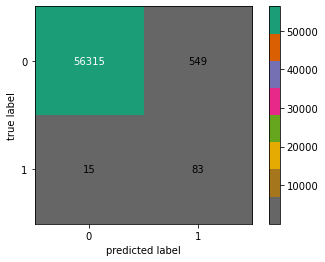

In [64]:
nn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=nn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.85      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [66]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Decision Trees

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_split= 3, min_samples_leaf = 1, random_state=30)
#import time
#start_time = time.clock()
dt_clf = dt_clf.fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [69]:
y_test_pred = dt_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9938204416979741


In [70]:
print(confusion_matrix(y_test, y_test_pred))

[[56529   335]
 [   17    81]]


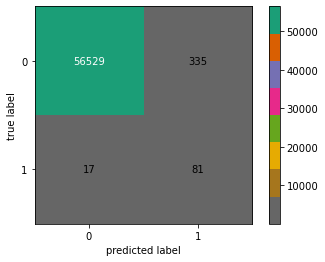

In [71]:
dt_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=dt_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [72]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.83      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.91      0.66     56962
weighted avg       1.00      0.99      1.00     56962



In [73]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gaussian Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
import time
#start_time = time.clock()
gnb_clf = GaussianNB().fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [76]:
y_test_pred = gnb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9780555458024648


In [77]:
print(confusion_matrix(y_test, y_test_pred))

[[55632  1232]
 [   18    80]]


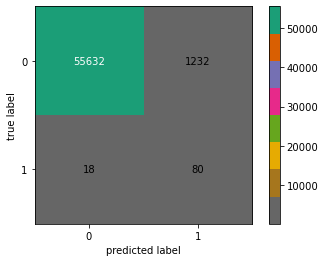

In [78]:
gnb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gnb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [79]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [80]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
#import time
#start_time = time.clock()
gb_clf = gb_clf.fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [83]:
y_test_pred = gb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9957515536673572


In [84]:
print(confusion_matrix(y_test, y_test_pred))

[[56640   224]
 [   18    80]]


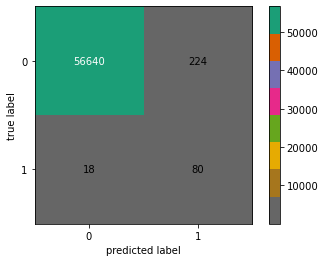

In [85]:
gb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [86]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.82      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.91      0.70     56962
weighted avg       1.00      1.00      1.00     56962



In [87]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### K-Nearest Neighbors(KNN)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
#import time
#start_time = time.clock()
knn_clf = knn_clf.fit(X_train_norm, y_train)
#print(time.clock() - start_time, "seconds")

In [90]:
y_test_pred = knn_clf.predict(X_test_norm)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9987886661282961


In [91]:
print(confusion_matrix(y_test, y_test_pred))

[[56816    48]
 [   21    77]]


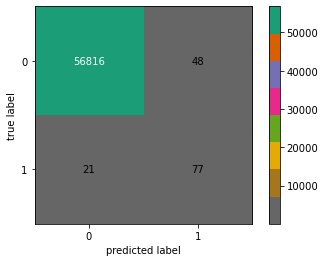

In [92]:
knn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=knn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [93]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.79      0.69        98

    accuracy                           1.00     56962
   macro avg       0.81      0.89      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [94]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Voting Classifier

In [95]:
from sklearn.ensemble import VotingClassifier

labels = ["Logistic Regression", "Random Forest", "Multi-layer Perceptron"]
from sklearn.ensemble import VotingClassifier

In [96]:
voting_clf = VotingClassifier (estimators = [('lr', lr_clf), ('rf', rf_clf), ('nn', nn_clf)],
voting='soft')
#import time
#start_time = time.clock()
voting_clf.fit(X_train,y_train)
#print(time.clock() - start_time, "seconds")

y_test_pred = voting_clf.predict(X_test)

In [97]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9991222218320986


In [98]:
print(confusion_matrix(y_test, y_test_pred))

[[56835    29]
 [   21    77]]


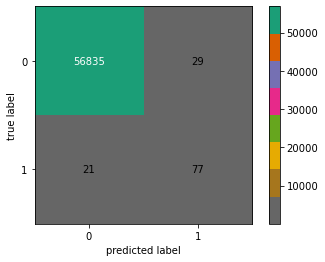

In [99]:
voting_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=voting_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [100]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.79      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [101]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

# Support vector machine(SVM)

In [102]:
from sklearn.svm import LinearSVC
#import time
#start_time = time.clock()
svm_clf = svm.SVC(kernel='linear', gamma = 'auto', C = 2, probability=True).fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")
y_test_pred = svm_clf.predict(X_test)

In [103]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9934868859941716


In [104]:
print(confusion_matrix(y_test, y_test_pred))

[[56509   355]
 [   16    82]]


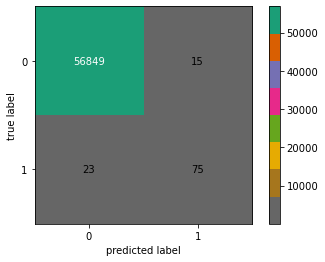

In [105]:
svm_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [106]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.84      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.92      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [107]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### Result

In [108]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

In [109]:
df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,LR,99.270000
1,RF,99.930000
2,XGBoost,99.940000
3,Ada Boost,99.660000
4,SGD,99.160000
5,NN(Supervised),99.010000
6,DT,99.380000
7,GNB,97.810000
8,GB,99.580000
9,KNN,99.880000


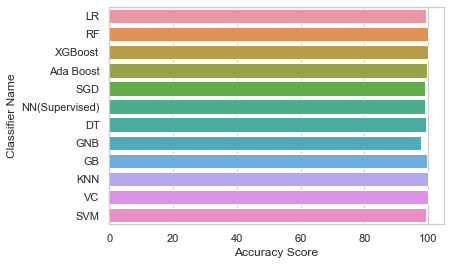

In [110]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

###ROC Curve

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.pyplot import figure

In [112]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_clf.predict_proba(X_test)
rf_probs = rf_clf.predict_proba(X_test)
xgb_probs = xgb_clf.predict_proba(X_test)
svm_probs = svm_clf.predict_proba(X_test)
adaboost_probs = adaboost_clf.predict_proba(X_test)
sgd_probs = sgd_clf.predict_proba(X_test)
nn_probs = nn_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
gnb_probs = gnb_clf.predict_proba(X_test)
gb_probs = gb_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
voting_probs = voting_clf.predict_proba(X_test)

In [113]:
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
svm_probs = svm_probs[:, 1]
adaboost_probs = adaboost_probs[:, 1]
sgd_probs = sgd_probs[:, 1]
nn_probs = nn_probs[:, 1]
dt_probs = dt_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
gb_probs = gb_probs[:, 1]
knn_probs = knn_probs[:, 1]
voting_probs = voting_probs[:, 1]

In [114]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
sgd_auc = roc_auc_score(y_test, sgd_probs)
nn_auc = roc_auc_score(y_test, nn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
voting_auc = roc_auc_score(y_test, voting_probs)


In [115]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)

In [116]:
import matplotlib.pyplot as plt

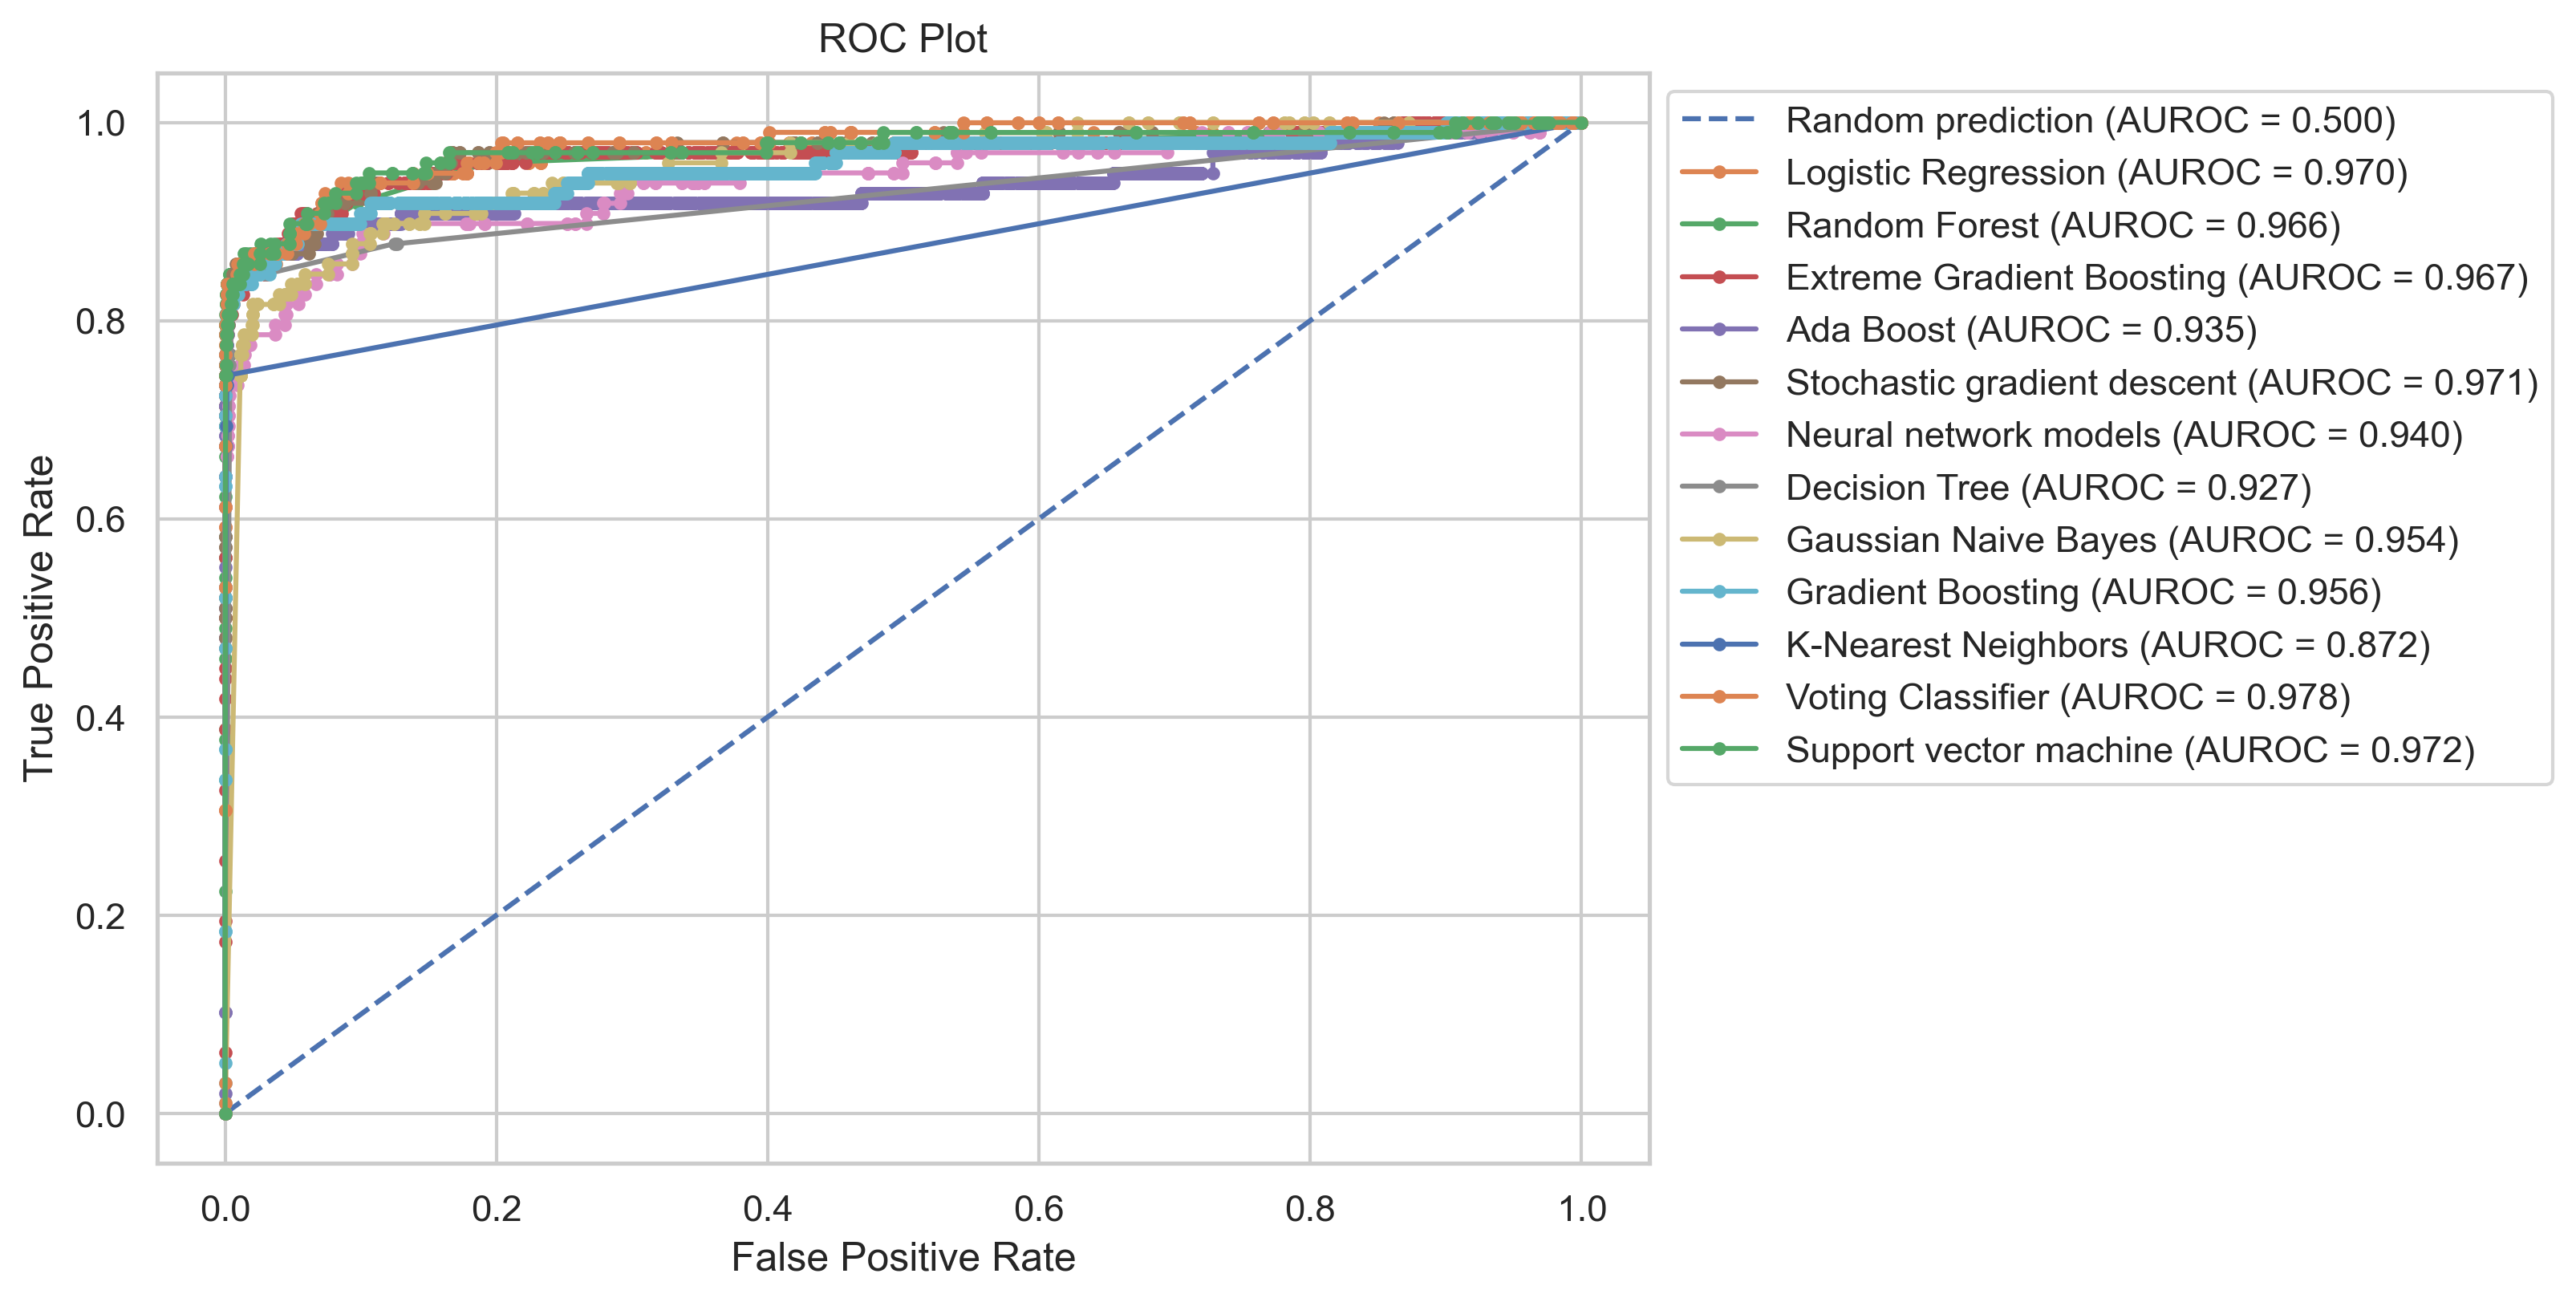

In [117]:
figure(figsize=(8, 6), dpi=300)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Extreme Gradient Boosting (AUROC = %0.3f)' % xgb_auc)
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='Ada Boost (AUROC = %0.3f)' % adaboost_auc)
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='Stochastic gradient descent (AUROC = %0.3f)' % sgd_auc)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural network models (AUROC = %0.3f)' % nn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes (AUROC = %0.3f)' % gnb_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(voting_fpr, voting_tpr, marker='.', label='Voting Classifier (AUROC = %0.3f)' % voting_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support vector machine (AUROC = %0.3f)' % svm_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(bbox_to_anchor=(1,1), loc="upper left") # 
# Show plot
plt.show()

###Precision Recall F1-score

In [118]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

In [119]:
x = np.arange(len(names))
width = 0.35

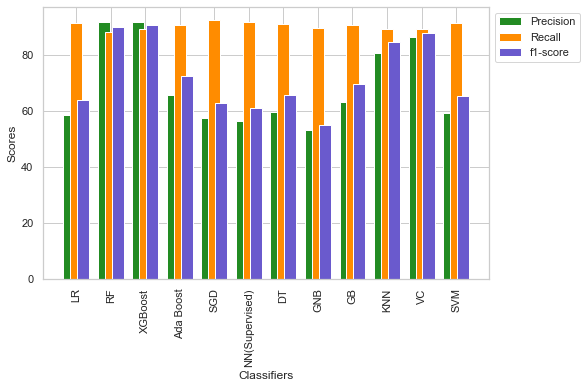

In [120]:
plt.figure(figsize=(8,5))
plt.bar(x-0.2, preci, width, color='forestgreen')
plt.bar(x, recall, width, color='darkorange')
plt.bar(x+0.2, f1, width, color='slateblue')
plt.xticks(x, names, rotation=90)
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.legend(["Precision", "Recall", "f1-score"], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [121]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [122]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,LR,99.27,58.46,91.48,63.9
1,RF,99.93,91.65,88.25,89.88
2,XGBoost,99.94,91.83,89.27,90.51
3,Ada Boost,99.66,65.55,90.66,72.45
4,SGD,99.16,57.64,92.45,62.77
5,NN(Supervised),99.01,56.55,91.86,61.12
6,DT,99.38,59.72,91.03,65.6
7,GNB,97.81,53.03,89.73,55.12
8,GB,99.58,63.14,90.62,69.79
9,KNN,99.88,80.78,89.24,84.5
